In [177]:
import pandas as pd
from statistics import mean, mode, median
import numpy as np
import seaborn as sns

In [178]:
data = pd.read_csv('Data.csv')

In [179]:
data.pivot_table(index = ['standard_type'], aggfunc='size')

standard_type
IC50    172
dtype: int64

In [180]:
data = data.query("standard_type == 'IC50'")

In [181]:
data.head()

,molecule_chembl_id,Smiles,standard_type,standard_value,standard_units,assay_type,assay_organism,target_organism
0,CHEMBL200215,COc1ccc(C(=O)Nc2ccc(CNc3ccc(-c4nc5ccccc5[nH]4)...,IC50,230.0,nM,B,Homo sapiens,Homo sapiens
1,CHEMBL199576,CCCOc1ccc(C(=O)Nc2ccc(-c3nc4ccccc4[nH]3)cc2)cc1Br,IC50,2200.0,nM,B,Homo sapiens,Homo sapiens
2,CHEMBL194140,COc1ccc(NC(=O)/C=C/c2ccc(-c3nc4cc(CC(=O)O)ccc4...,IC50,3000.0,nM,B,Homo sapiens,Homo sapiens
3,CHEMBL194231,O=C(O)Cc1ccc2oc(-c3ccc(/C=C/C(=O)Nc4ccc(Br)cc4...,IC50,400.0,nM,B,Homo sapiens,Homo sapiens
4,CHEMBL196338,COc1ccc(NC(=O)/C=C/c2ccc(-c3nc4cc(CC(=O)O)ccc4...,IC50,450.0,nM,B,Homo sapiens,Homo sapiens


In [182]:
def calcPic50(st_values):
    for i in range(0, len(st_values)):
        st_values[i] = st_values[i]*10**-9
        st_values[i] = round(-np.log10(st_values[i]), 3)
    return st_values

In [183]:
st_val = list(data['standard_value'])

In [184]:
pic50_vals = calcPic50(st_val)

In [185]:
data['pIC50'] = pic50_vals

In [186]:
data.head()

,molecule_chembl_id,Smiles,standard_type,standard_value,standard_units,assay_type,assay_organism,target_organism,pIC50
0,CHEMBL200215,COc1ccc(C(=O)Nc2ccc(CNc3ccc(-c4nc5ccccc5[nH]4)...,IC50,230.0,nM,B,Homo sapiens,Homo sapiens,6.638
1,CHEMBL199576,CCCOc1ccc(C(=O)Nc2ccc(-c3nc4ccccc4[nH]3)cc2)cc1Br,IC50,2200.0,nM,B,Homo sapiens,Homo sapiens,5.658
2,CHEMBL194140,COc1ccc(NC(=O)/C=C/c2ccc(-c3nc4cc(CC(=O)O)ccc4...,IC50,3000.0,nM,B,Homo sapiens,Homo sapiens,5.523
3,CHEMBL194231,O=C(O)Cc1ccc2oc(-c3ccc(/C=C/C(=O)Nc4ccc(Br)cc4...,IC50,400.0,nM,B,Homo sapiens,Homo sapiens,6.398
4,CHEMBL196338,COc1ccc(NC(=O)/C=C/c2ccc(-c3nc4cc(CC(=O)O)ccc4...,IC50,450.0,nM,B,Homo sapiens,Homo sapiens,6.347


In [187]:
data_dropped = data.drop(['standard_type', 'standard_value', 'standard_units', 'assay_type', 'assay_organism', 'target_organism'], axis=1)

In [188]:
data_dropped.head()

,molecule_chembl_id,Smiles,pIC50
0,CHEMBL200215,COc1ccc(C(=O)Nc2ccc(CNc3ccc(-c4nc5ccccc5[nH]4)...,6.638
1,CHEMBL199576,CCCOc1ccc(C(=O)Nc2ccc(-c3nc4ccccc4[nH]3)cc2)cc1Br,5.658
2,CHEMBL194140,COc1ccc(NC(=O)/C=C/c2ccc(-c3nc4cc(CC(=O)O)ccc4...,5.523
3,CHEMBL194231,O=C(O)Cc1ccc2oc(-c3ccc(/C=C/C(=O)Nc4ccc(Br)cc4...,6.398
4,CHEMBL196338,COc1ccc(NC(=O)/C=C/c2ccc(-c3nc4cc(CC(=O)O)ccc4...,6.347


In [189]:
from rdkit import Chem
from rdkit.Chem import AllChem, Draw, Descriptors
from rdkit.Chem.Descriptors import rdMolDescriptors

In [190]:
smile = data['Smiles'][0:172]
smile

0      COc1ccc(C(=O)Nc2ccc(CNc3ccc(-c4nc5ccccc5[nH]4)...
1      CCCOc1ccc(C(=O)Nc2ccc(-c3nc4ccccc4[nH]3)cc2)cc1Br
2      COc1ccc(NC(=O)/C=C/c2ccc(-c3nc4cc(CC(=O)O)ccc4...
3      O=C(O)Cc1ccc2oc(-c3ccc(/C=C/C(=O)Nc4ccc(Br)cc4...
4      COc1ccc(NC(=O)/C=C/c2ccc(-c3nc4cc(CC(=O)O)ccc4...
                             ...                        
167    O=C(O)Cc1ccc2oc(-c3cccc(NC(=O)Nc4cccc(-c5nc6cc...
168    CC(NC(=O)Cc1ccc2oc(-c3ccc(NC(=O)Nc4ccc(-c5nc6c...
169    O=C(O)CNC(=O)Cc1ccc2oc(-c3ccc(NC(=O)Nc4ccc(-c5...
170    O=C(O)Cc1ccc2oc(-c3ccc(NC(=S)Nc4ccc(-c5nc6cc(C...
171    CC(=O)N[C@H]1[C@@H](O[C@@H]2C(C(=O)O)O[C@@H](O...
Name: Smiles, Length: 172, dtype: object

In [191]:
data_dropped.loc [data_dropped['pIC50'] >= 6.0, 'pIC50'] = 'active'

In [192]:
data_dropped

,molecule_chembl_id,Smiles,pIC50
0,CHEMBL200215,COc1ccc(C(=O)Nc2ccc(CNc3ccc(-c4nc5ccccc5[nH]4)...,active
1,CHEMBL199576,CCCOc1ccc(C(=O)Nc2ccc(-c3nc4ccccc4[nH]3)cc2)cc1Br,5.658
2,CHEMBL194140,COc1ccc(NC(=O)/C=C/c2ccc(-c3nc4cc(CC(=O)O)ccc4...,5.523
3,CHEMBL194231,O=C(O)Cc1ccc2oc(-c3ccc(/C=C/C(=O)Nc4ccc(Br)cc4...,active
4,CHEMBL196338,COc1ccc(NC(=O)/C=C/c2ccc(-c3nc4cc(CC(=O)O)ccc4...,active
...,...,...,...
167,CHEMBL4293844,O=C(O)Cc1ccc2oc(-c3cccc(NC(=O)Nc4cccc(-c5nc6cc...,5
168,CHEMBL4290499,CC(NC(=O)Cc1ccc2oc(-c3ccc(NC(=O)Nc4ccc(-c5nc6c...,active
169,CHEMBL4283311,O=C(O)CNC(=O)Cc1ccc2oc(-c3ccc(NC(=O)Nc4ccc(-c5...,active
170,CHEMBL4287084,O=C(O)Cc1ccc2oc(-c3ccc(NC(=S)Nc4ccc(-c5nc6cc(C...,5.742


In [197]:
smile_1 = data['Smiles'][1]
smile_1

'CCCOc1ccc(C(=O)Nc2ccc(-c3nc4ccccc4[nH]3)cc2)cc1Br'

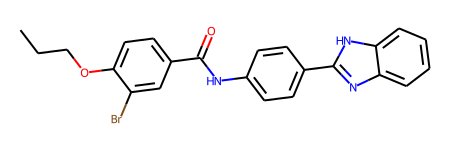

In [200]:
mol_1 = Chem.MolFromSmiles(smile_1)
mol_1

In [201]:
def describe_mol(mol_1):
    des_obj = rdMolDescriptors.GetMACCSKeysFingerprint(mol_1)
    des = des_obj.ToBitString()
    print(f'nMACCSKeys: {des}', sep= ';')

In [207]:
describe_mol(mol_1)

nMACCSKeys: 00000000000000000000000000000000000000100000001000000000000000100100000000000101000100010000100010000100010101100111011011000111000111110100001111010011111111111111110


In [208]:
mol_11=describe_mol(mol_1)

nMACCSKeys: 00000000000000000000000000000000000000100000001000000000000000100100000000000101000100010000100010000100010101100111011011000111000111110100001111010011111111111111110
